**Import Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Load and Explore Datasets**

In [10]:
from sklearn.datasets import load_iris  # Import the function to load the Iris dataset

# Load the Iris dataset into a dictionary-like object
iris = load_iris()

# Create a DataFrame 'X' from the dataset features with appropriate column names
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Create a Series 'y' from the target labels of the dataset, and name it 'species'
y = pd.Series(iris.target, name='species')


**Explore Datasets**

In [6]:
# Display the first few rows of the dataset
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Check for any missing values
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
# Basic statistics
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Data Cleaning**  
Check for Missing Values

In [16]:
# In case of missing values, you might fill or drop them
X.fillna(X.mean(), inplace=True)

Encode Target Labels:

In [14]:
# Mapping target values to species names
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
y_mapped = y.map(species_map)
y_mapped.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

**Data Visualization**

Pairplot:  
Visualize the relationships between features.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

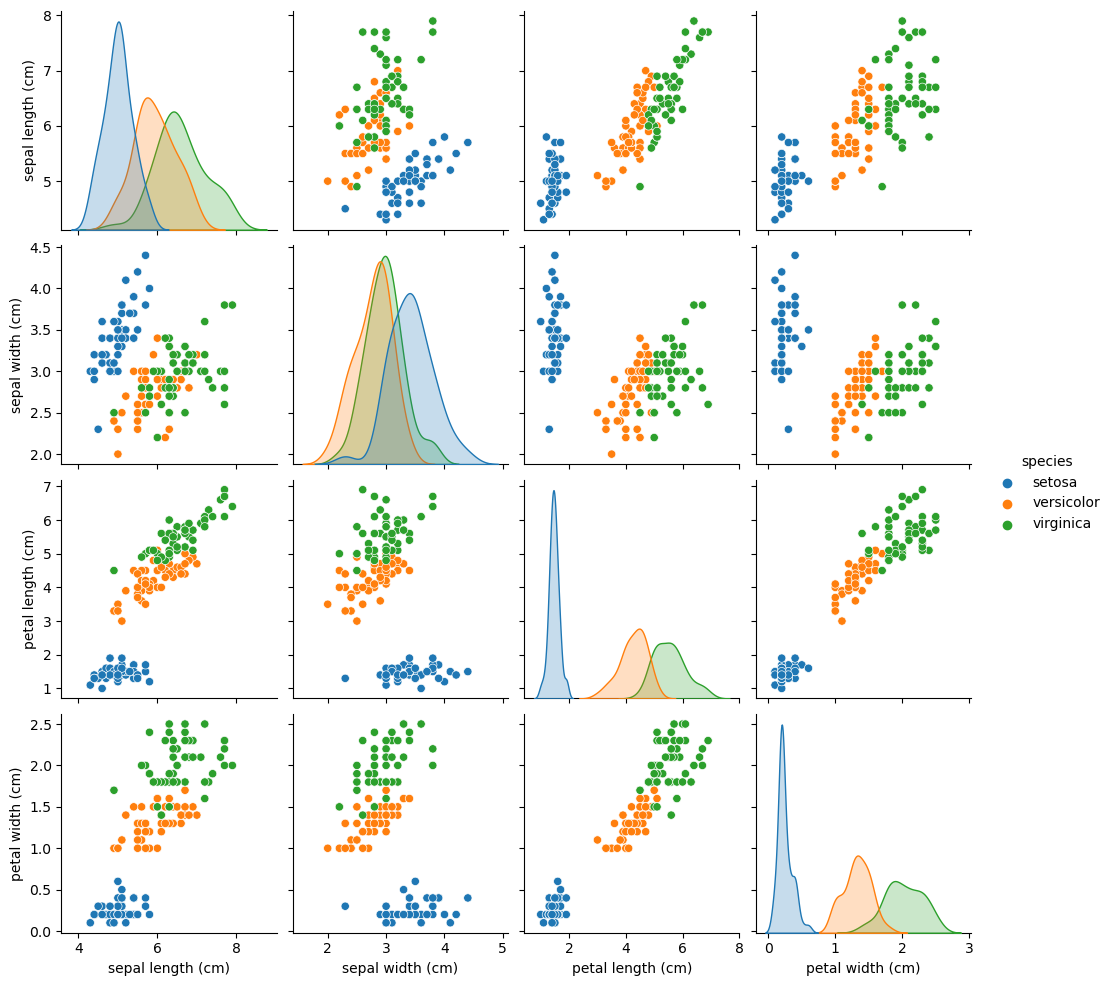

In [18]:
# Create a pairplot using Seaborn to visualize relationships between features
# 'X' is the DataFrame containing the features, and 'y_mapped' contains the target labels mapped to species names
# Concatenate 'X' and 'y_mapped' along the columns (axis=1) to create a single DataFrame for plotting
sns.pairplot(pd.concat([X, y_mapped], axis=1), hue='species')

# Display the plot
plt.show()


Distribution of Each Feature:  
Visualize the distribution of each feature using histograms or boxplots.

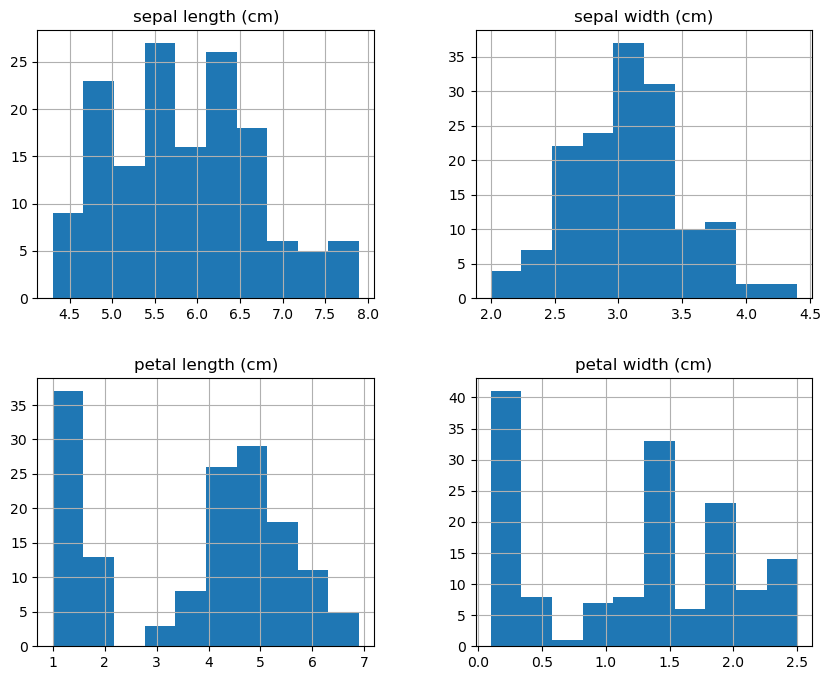

In [20]:
# Create a histogram for each feature in the DataFrame 'X' to visualize the distribution of the data
# The 'figsize' parameter is used to set the size of the entire figure to 10x8 inches
X.hist(figsize=(10, 8))

# Display the histograms
plt.show()


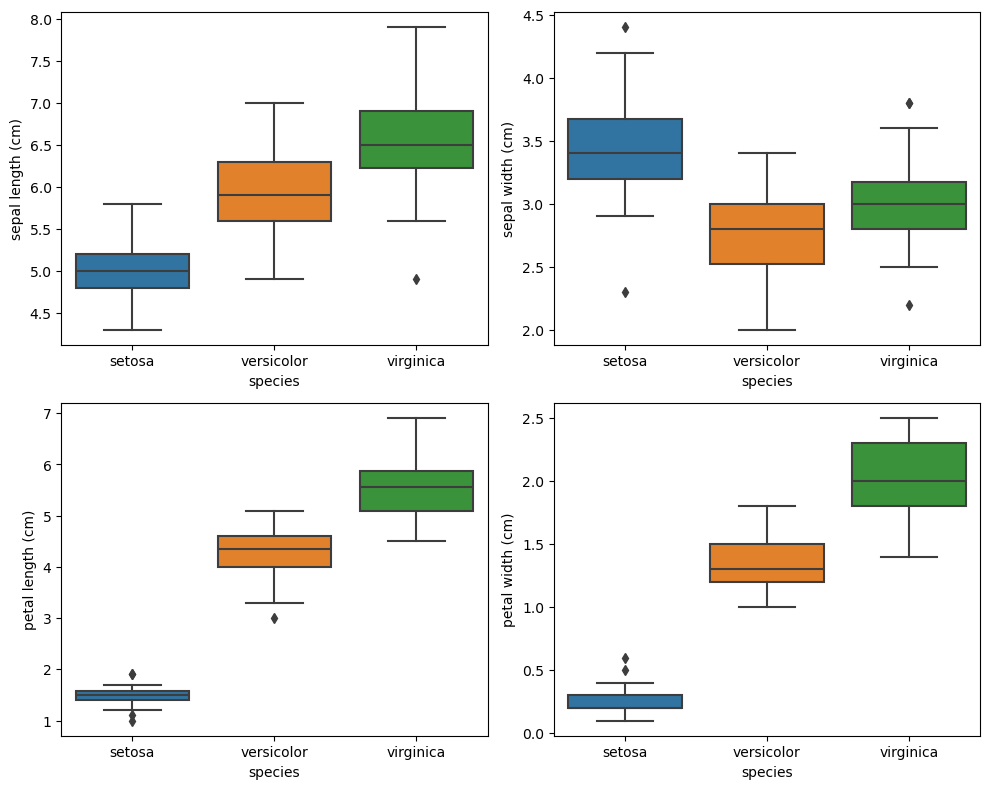

In [10]:
plt.figure(figsize=(10, 8))
for idx, column in enumerate(X.columns):
    plt.subplot(2, 2, idx+1)
    sns.boxplot(x=y_mapped, y=X[column])
plt.tight_layout()
plt.show()

**Split the Data**  
Split into Training and Testing Sets:  
Split the dataset into training and testing sets to evaluate the model's performance.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**
Standardize the Features:  
Standardizing the data can improve the performance of many machine learning algorithms.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Training**  
Train a Logistic Regression Model:

In [13]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

**Model Evaluation**  
Make Predictions:  
Predict the species on the test set.

In [14]:
y_pred = model.predict(X_test_scaled)

**Evaluate the Model:**  
Use accuracy, confusion matrix, and classification report to evaluate the model.

Accuracy: 100.00%


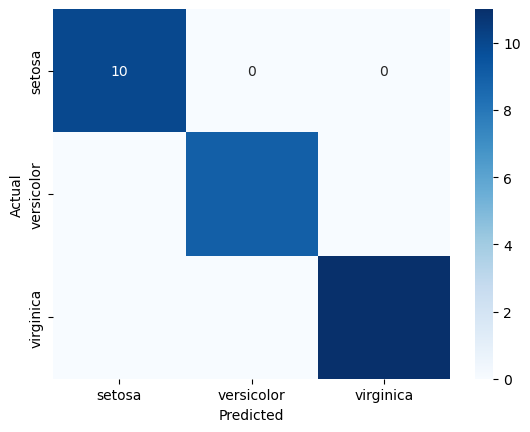

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

**Save the Model**  
Save the Model and Scaler:

In [16]:
import joblib

# Save the model
joblib.dump(model, 'iris_logistic_regression.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Create a Prediction Script**  
Load the Model and Make Predictions:

In [17]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    model = joblib.load('iris_logistic_regression.pkl')
    scaler = joblib.load('scaler.pkl')
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    species = species_map[prediction[0]]
    return species

# Example 
print(predict_species(5.1, 3.5, 1.4, 0.2))


setosa


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
